In [32]:
import numpy as np
import pandas as pd

from pathlib import Path
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt 
import seaborn as sns

import os
from joblib import dump, load

In [2]:
red_df = pd.read_csv('resources/winequality-red.csv',sep=';')
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
red_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
red_df.shape


(1599, 12)

In [5]:
# red_df.info()

In [6]:
#red_df.isnull().sum()

In [7]:
red_df.quality.value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:>

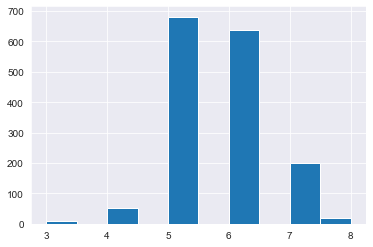

In [8]:
sns.set_style('darkgrid')
red_df.quality.hist()

In [9]:
# poor quality = 0, good quality = 1
red_df['quality'] = red_df['quality'].apply(lambda qual: 1 if qual>=6 else 0) 


In [10]:
red_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [11]:
# for now we didn't drop duplicates, 
red_df.duplicated().sum() 

240

In [12]:
X = red_df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [13]:
y = LabelEncoder().fit_transform(red_df['quality'])
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Logistic Regression


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
red_w = LogisticRegression(max_iter=10000, random_state = 42).fit(X_train, y_train)



In [16]:
print(f"Training Data Score: {red_w.score(X_train, y_train)}")
print(f"Testing Data Score: {red_w.score(X_test, y_test)}")

Training Data Score: 0.7514595496246872
Testing Data Score: 0.7325


In [17]:
target_names = ["poor", "good"]

In [18]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = red_w.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

print(classification_report(y_true, y_pred, target_names=target_names))
cm

              precision    recall  f1-score   support

        poor       0.68      0.74      0.71       178
        good       0.78      0.73      0.75       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.73       400



array([[132,  46],
       [ 61, 161]], dtype=int64)

In [19]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_pred))

Accuracy: 0.7325
Precision: 0.7777777777777778
Sensitivity: 0.7252252252252253


Text(0.5, 257.44, 'Predicted label')

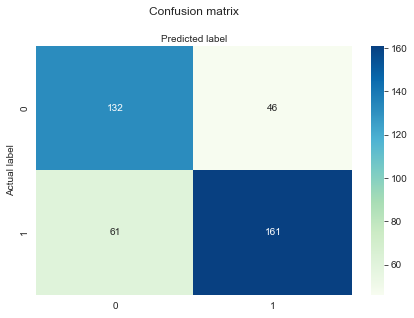

In [20]:
class_names=["poor_wine","good_wine"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="GnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

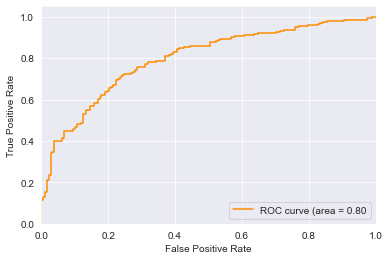

In [21]:
y_pred_proba = red_w.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression Scaled

In [22]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
log_scaled = LogisticRegression(max_iter=10000, random_state=42).fit(X_train_scaled, y_train)
#log_scaled.score(X_test_scaled,y_test)

predictions = log_scaled.predict(X_test_scaled)
y1_true = y_test
y_scaled_pred = log_scaled.predict(X_test_scaled)
cm_log_scaled = confusion_matrix(y1_true, y_scaled_pred)

print(classification_report(y1_true, y_scaled_pred, target_names=target_names))
cm_log_scaled

              precision    recall  f1-score   support

        poor       0.68      0.73      0.70       178
        good       0.77      0.73      0.75       222

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



array([[130,  48],
       [ 61, 161]], dtype=int64)

In [24]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y1_true, y_scaled_pred))
print("Precision:",metrics.precision_score(y1_true, y_scaled_pred))
print("Sensitivity:",metrics.recall_score(y1_true, y_scaled_pred))

Accuracy: 0.7275
Precision: 0.7703349282296651
Sensitivity: 0.7252252252252253


### Additional Models 

In [25]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    #plt.show()    

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

**Regressors - Scaled Data**

In [28]:
test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)



Model: LinearRegression
Train score: 0.3053717942716495
Test Score: 0.2604384227251708

Model: KNeighborsRegressor
Train score: 0.48677105487917194
Test Score: 0.20639740864459954

Model: RandomForestRegressor
Train score: 0.9221428745276015
Test Score: 0.44907278064581424

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.46847352970948475

Model: AdaBoostRegressor
Train score: 0.33179462013162986
Test Score: 0.2551990549826605

Model: SVR
Train score: 0.49982192783283497
Test Score: 0.3540557401114375



**Classifiers and Regressors - without Scaler**


In [29]:
def test_model2(model, data1):
    X_train, X_test, y_train, y_test = data1
    reg2 = model.fit(X_train, y_train)
    print(f'Model: {type(reg2).__name__}')
    print(f'Train score: {reg2.score(X_train, y_train)}')
    print(f'Test Score: {reg2.score(X_test, y_test)}\n')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
data1 = [X_train, X_test, y_train, y_test]

In [33]:
test_model(KNeighborsClassifier(), data)
test_model(RandomForestClassifier(), data)
test_model(ExtraTreesClassifier(), data)
test_model(AdaBoostClassifier(), data)
test_model(SVC(kernel="rbf"), data)

Model: KNeighborsClassifier
Train score: 0.8198498748957465
Test Score: 0.7025

Model: RandomForestClassifier
Train score: 1.0
Test Score: 0.81

Model: ExtraTreesClassifier
Train score: 1.0
Test Score: 0.8125

Model: AdaBoostClassifier
Train score: 0.8006672226855713
Test Score: 0.75

Model: SVC
Train score: 0.8023352793994996
Test Score: 0.76



In [34]:
test_model2(LinearRegression(), data1)
test_model2(KNeighborsRegressor(), data1)
test_model2(RandomForestRegressor(), data1)
test_model2(ExtraTreesRegressor(), data1)
test_model2(AdaBoostRegressor(), data1)
test_model2(SVR(C=1.0, epsilon=0.2), data1)

Model: LinearRegression
Train score: 0.3053717942716495
Test Score: 0.26043842272517115

Model: KNeighborsRegressor
Train score: 0.4099339618955111
Test Score: 0.029456422714849495

Model: RandomForestRegressor
Train score: 0.9221857105376272
Test Score: 0.43757667780139675

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.45880858386476353

Model: AdaBoostRegressor
Train score: 0.33327620246840517
Test Score: 0.24680361591503497

Model: SVR
Train score: 0.2082735246193893
Test Score: 0.14675788453501537



### RandomForestRegression Model¶

RandomForestRegression Model is considered as a highly accurate method, but is slower in generating predictions. Multiple decision trees are used to determine the final output - the average of all the tree outputs is considered as the final result, which gives more accurate and stable prediction. We predict that it will fit better to our dataset with multiple features.

In [35]:
rfc = RandomForestClassifier(random_state=0, n_estimators=500, max_depth=30).fit(X_train, y_train)
y_r_pred = rfc.predict(X_test)
y_true = y_test
cm_r = confusion_matrix(y_true, y_r_pred)
cm_r

print(classification_report(y_true, y_r_pred, target_names=target_names))
cm_r

              precision    recall  f1-score   support

        poor       0.78      0.75      0.77       178
        good       0.81      0.83      0.82       222

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.80      0.79       400



array([[134,  44],
       [ 38, 184]], dtype=int64)

In [36]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_true, y_r_pred))
print("Precision:",metrics.precision_score(y_true, y_r_pred))
print("Sensitivity:",metrics.recall_score(y_true, y_r_pred))

Accuracy: 0.795
Precision: 0.8070175438596491
Sensitivity: 0.8288288288288288


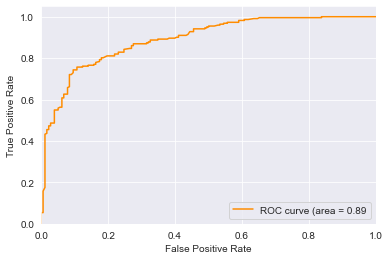

In [37]:
yrfc_pred_proba = rfc.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  yrfc_pred_proba)
auc = metrics.roc_auc_score(y_test, yrfc_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [38]:
#dump(rfc,'Red_Wine_Quality_NS.joblib')

### RandomForestRegression Model Scaled

In [39]:
rfc_scaled = RandomForestClassifier(random_state=0, n_estimators=500).fit(X_train_scaled, y_train)
y_rfc_scaled_pred = rfc_scaled.predict(X_test_scaled)

y_rfcs_true = y_test
cm_rfcs = confusion_matrix(y_rfcs_true, y_rfc_scaled_pred)

print(classification_report(y_rfcs_true, y_rfc_scaled_pred, target_names=target_names))
cm_rfcs

              precision    recall  f1-score   support

        poor       0.78      0.76      0.77       178
        good       0.81      0.83      0.82       222

    accuracy                           0.80       400
   macro avg       0.80      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



array([[135,  43],
       [ 38, 184]], dtype=int64)

In [40]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_rfcs_true, y_rfc_scaled_pred))
print("Precision:",metrics.precision_score(y_rfcs_true, y_rfc_scaled_pred))
print("Sensitivity:",metrics.recall_score(y_rfcs_true, y_rfc_scaled_pred))

Accuracy: 0.7975
Precision: 0.8105726872246696
Sensitivity: 0.8288288288288288


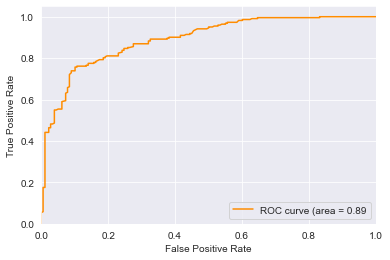

In [41]:
y_rfc_scaled_pred_proba =rfc_scaled.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_rfc_scaled_pred_proba)
auc = metrics.roc_auc_score(y_test, y_rfc_scaled_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## RandomForest Feature Importances and Selection

[('free sulfur dioxide', 0.05628201777249582), ('residual sugar', 0.056474876337824824), ('citric acid', 0.06334936750321869), ('pH', 0.0639517181145236), ('fixed acidity', 0.06429952489103924), ('chlorides', 0.07391811229248094), ('density', 0.09184872913379998), ('total sulfur dioxide', 0.10224582239330483), ('volatile acidity', 0.10428595875957562), ('sulphates', 0.13423031627412668), ('alcohol', 0.18911355652760975)]


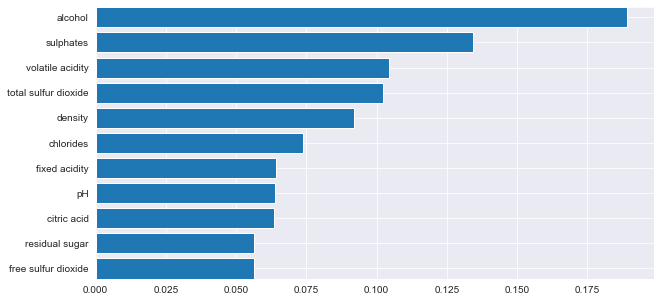

In [42]:
%matplotlib inline

feature_importances = rfc.feature_importances_
features1 = sorted(zip(X_test.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features1]
width = [f[1] for f in features1]
print(features1)
fig, ax = plt.subplots()

fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [43]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfc)
sel.fit(X_train, y_train)
sel.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [44]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [45]:
print(selected_feat)

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


In [46]:
# cross validation Recursive Feature Elimination

# from sklearn.feature_selection import RFECV


# rf = RandomForestRegressor(random_state=0) 
# #rf.fit(X_train,y_train)
# rfe = RFECV(rf,cv=5,scoring="neg_mean_squared_error") 
# rfe.fit(X_train,y_train)


In [47]:
 X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

In [48]:
rfc_clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_selected_train, y_train)
y_rfc_clf_pred = rfc_clf.predict(X_selected_test)

y_rfc_clf_true = y_test
cm_rfc_clf = confusion_matrix(y_rfc_clf_true, y_rfc_clf_pred)

print(classification_report(y_rfc_clf_true, y_rfc_clf_pred, target_names=target_names))
cm_rfc_clf

              precision    recall  f1-score   support

        poor       0.77      0.84      0.81       188
        good       0.85      0.78      0.81       212

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



array([[158,  30],
       [ 46, 166]], dtype=int64)

In [49]:
print("Accuracy:",metrics.accuracy_score(y_rfc_clf_true, y_rfc_clf_pred))
print("Precision:",metrics.precision_score(y_rfc_clf_true, y_rfc_clf_pred))
print("Sensitivity:",metrics.recall_score(y_rfc_clf_true, y_rfc_clf_pred))

Accuracy: 0.81
Precision: 0.8469387755102041
Sensitivity: 0.7830188679245284


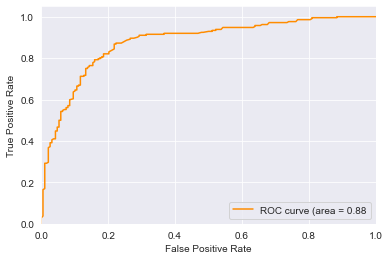

In [50]:
y_rfc_clf_pred_proba =rfc_clf.predict_proba(X_selected_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_rfc_clf_pred_proba)
auc = metrics.roc_auc_score(y_test, y_rfc_clf_pred_proba)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr, color = 'darkorange',
         label = f'ROC curve (area = {auc:0.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [51]:
dump(rfc_clf ,'Red_Wine_Quality.joblib')

['Red_Wine_Quality.joblib']

### Model testing

In [52]:
red_wine_model = load('Red_Wine_Quality.joblib') 

In [53]:

print(red_wine_model.predict([[0.12,18.5,.9900,0.33,14.3]]))


[1]


### RandomForest Scaled - Feature Selection

In [ ]:
# X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
# scaler = StandardScaler().fit(X_selected_train)
# X_selected_train = scaler.transform(X_selected_train)
# X_selected_test_scaled = scaler.transform(X_selected_test)

### Logistic Regression with Feature Selection (fro Random Forest) 

In [ ]:
# clf = LogisticRegression()
# clf.fit(X_selected_train_scaled, y_train)
# print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
# print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')